In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from pylab import rcParams
import seaborn as sns

#conda install -c conda-forge wordcloud
from wordcloud import WordCloud


### reading data

In [2]:
mid0_text = pd.read_csv("df_mid0.csv")
mid0_text = mid0_text.dropna()
mid0_text = mid0_text.drop(columns=['Unnamed: 0'])


west0_text = pd.read_csv("df_west0.csv")
west0_text = west0_text.dropna()
west0_text = west0_text.drop(columns=['Unnamed: 0'])


east0_text = pd.read_csv("df_east0.csv")
east0_text = east0_text.dropna()
east0_text = east0_text.drop(columns=['Unnamed: 0'])




In [3]:
mid0_text

id                                            value_x  \
0      1394965330578055168  RT @maximum_sincere: Fuck it must be insanely ...   
1      1394965332650045441  RT @shazahrah: ??!! Melbourne shut down their ...   
2      1394965334239629315                Transvision Vamp - I Want Your Love   
3      1394965334612971521  RT @fizawanders: Cannot unsee ğŸ˜‚ #MasterChef...   
4      1394965335288205312                 @msimaker1 https://t.co/4PyGqvn0nK   
...                    ...                                                ...   
30799  1395442736724054016  RT @MattCrossin: I wrote about Marxism, Anarch...   
30800  1395442749558509569  RT @jasmineee_cr: soulmates always find each o...   
30801  1395442750460370944  @RFT741 @cleary_mitch @AFLcomau Out of the 4 M...   
30802  1395442758454755332  RT @pixieaeri: ASIANğŸ‘�ğŸ�»MENğŸ‘�ğŸ�»AREğŸ‘�...   
30803  1395442758756704257  RT @Cazzawhy: I really appreciate so much that...   

        value_y group language  follower  friend  \
0     -0.333333   mid       en        29    1389   
1     -0.063889   mid       en       545     906   
2      0.500000   mid       en        52      65   
3      0.000000   mid       en       580    1695   
4      0.000000   mid      und      2653     366   
...         ...   ...      ...       ...     ...   
30799  0.000000   mid       en       278    2120   
30800 -0.125000   mid       en        54      83   
30801  0.000000   mid       en        91     502   
30802  0.000000   mid       en        22     171   
30803  0.066667   mid       en       729     270   

                                 time  
0      Wed May 19 10:37:06 +0000 2021  
1      Wed May 19 10:37:07 +0000 2021  
2      Wed May 19 10:37:07 +0000 2021  
3      Wed May 19 10:37:07 +0000 2021  
4      Wed May 19 10:37:07 +0000 2021  
...                               ...  
30799  Thu May 20 18:14:09 +0000 2021  
30800  Thu May 20 18:14:12 +0000 2021  
30801  Thu May 20 18:14:12 +0000 2021  
30802  Thu May 20 18:14:14 +0000 2021  
30803  Thu May 20 18:14:14 +0000 2021  

[30804 rows x 8 columns]

In [4]:

text_len = []
for i in range(len(mid0_text['value_x'])):
    length =  len(mid0_text['value_x'][i])
    text_len.append(length)
mid0_text["text_len"] = text_len  

hour = []
for i in range(len(mid0_text['value_x'])):
    hour_cur =  int(mid0_text['time'][i][11:13])
    hour.append(hour_cur)
mid0_text["hour"] = hour 



text_len = []
for i in range(len(west0_text['value_x'])):
    length =  len(west0_text['value_x'][i])
    text_len.append(length)
west0_text["text_len"] = text_len  

hour = []
for i in range(len(west0_text['value_x'])):
    hour_cur =  int(west0_text['time'][i][11:13])
    hour.append(hour_cur)
west0_text["hour"] = hour 



text_len = []
for i in range(len(east0_text['value_x'])):
    length =  len(east0_text['value_x'][i])
    text_len.append(length)
east0_text["text_len"] = text_len  

hour = []
for i in range(len(east0_text['value_x'])):
    hour_cur =  int(east0_text['time'][i][11:13])
    hour.append(hour_cur)
east0_text["hour"] = hour 






In [5]:
mid0_text

id                                            value_x  \
0      1394965330578055168  RT @maximum_sincere: Fuck it must be insanely ...   
1      1394965332650045441  RT @shazahrah: ??!! Melbourne shut down their ...   
2      1394965334239629315                Transvision Vamp - I Want Your Love   
3      1394965334612971521  RT @fizawanders: Cannot unsee ğŸ˜‚ #MasterChef...   
4      1394965335288205312                 @msimaker1 https://t.co/4PyGqvn0nK   
...                    ...                                                ...   
30799  1395442736724054016  RT @MattCrossin: I wrote about Marxism, Anarch...   
30800  1395442749558509569  RT @jasmineee_cr: soulmates always find each o...   
30801  1395442750460370944  @RFT741 @cleary_mitch @AFLcomau Out of the 4 M...   
30802  1395442758454755332  RT @pixieaeri: ASIANğŸ‘�ğŸ�»MENğŸ‘�ğŸ�»AREğŸ‘�...   
30803  1395442758756704257  RT @Cazzawhy: I really appreciate so much that...   

        value_y group language  follower  friend  \
0     -0.333333   mid       en        29    1389   
1     -0.063889   mid       en       545     906   
2      0.500000   mid       en        52      65   
3      0.000000   mid       en       580    1695   
4      0.000000   mid      und      2653     366   
...         ...   ...      ...       ...     ...   
30799  0.000000   mid       en       278    2120   
30800 -0.125000   mid       en        54      83   
30801  0.000000   mid       en        91     502   
30802  0.000000   mid       en        22     171   
30803  0.066667   mid       en       729     270   

                                 time  text_len  hour  
0      Wed May 19 10:37:06 +0000 2021       142    10  
1      Wed May 19 10:37:07 +0000 2021       142    10  
2      Wed May 19 10:37:07 +0000 2021        35    10  
3      Wed May 19 10:37:07 +0000 2021        72    10  
4      Wed May 19 10:37:07 +0000 2021        34    10  
...                               ...       ...   ...  
30799  Thu May 20 18:14:09 +0000 2021       142    18  
30800  Thu May 20 18:14:12 +0000 2021        50    18  
30801  Thu May 20 18:14:12 +0000 2021       142    18  
30802  Thu May 20 18:14:14 +0000 2021       102    18  
30803  Thu May 20 18:14:14 +0000 2021       142    18  

[30804 rows x 10 columns]

### population

In [6]:
pop = pd.read_csv("simplePopulation.csv")

pop

sex_ratio         sa2_name16   percentage_person_aged_15_64  \
0         97.6     Altona Meadows                           68.0   
1         97.3  Prahran - Windsor                           79.9   
2        101.9        Collingwood                           82.0   
3         93.4           Hadfield                           61.1   
4         98.8            Sunbury                           67.0   
..         ...                ...                            ...   
304       96.4        Mount Eliza                           58.0   
305       94.7       Mount Martha                           58.1   
306       98.0       Point Nepean                           53.7   
307       91.8   Rosebud - McCrae                           53.4   
308       93.9         Somerville                           65.7   

      females_num   percentage_person_aged_0_14   persons_num   sa2_main16  \
0           10350                          16.8         20454    213021342   
1           11268                           8.3         22234    206061136   
2            5440                          10.7         10984    206071141   
3            3187                          19.5          6165    210031440   
4            6819                          20.0         13558    210041240   
..            ...                           ...           ...          ...   
304          9743                          21.2         19140    214021381   
305         10283                          20.7         20022    214021382   
306          9451                          15.1         18709    214021383   
307         11621                          15.1         22286    214021384   
308         10004                          17.6         19402    214021385   

      percentage_person_aged_65_plus   males_num  state_name  
0                               15.2       10104    Victoria  
1                               11.9       10966    Victoria  
2                                7.3        5544    Victoria  
3                               19.4        2978    Victoria  
4                               13.1        6739    Victoria  
..                               ...         ...         ...  
304                             20.9        9397    Victoria  
305                             21.2        9739    Victoria  
306                             31.1        9258    Victoria  
307                             31.5       10665    Victoria  
308                             16.6        9398    Victoria  

[309 rows x 10 columns]

In [7]:
east_sub = ['Rosebud', 'Dromana', 'Safety Beach', 'Mount Martha', 'Mornington','Mount Eliza', 'Frankston South', 
            'Frankston', 'Merricks Beach', 'Balnarring', 'Balnarring Beach', 'Somers', 'Hmas Cerberus', 
            'Crib Point', 'Bittern', 'Hastings', 'Tyabb', 'Somerville', 'Baxter', 'Langwarrin South', 
            'Langwarrin', 'Frankston North', 'Seaford', 'Carrum Downs', 'Skye', 'Botanic Ridge', 'Cranbourne',
            'Cranbourne East', 'Cranbourne West', 'Cranbourne North', 'Patterson Lakes', 'Sandhurst', 'Carrum',
            'Bonbeach', 'Chelsea', 'Chelsea Heights', 'Edithvale', 'Aspendale', 'Beaumaris', 'Mentone', 'Parkdale',
            'Mordialloc', 'Aspendale Gardens', 'Braeside', 'Dingley Village', 'Springvale South', 'Keysborough', 
            'Dandenong', 'Dandenong South', 'Doveton', 'Lynbrook', 'Hampton Park', 'Hallam', 'Berwick', 'Narre Warren']


east_sub_count = 0
for i in range(len(east_sub)):
    for j in range(len(pop[' sa2_name16'])):
        if east_sub[i] == pop[' sa2_name16'][j]:
            east_sub_count += pop.at[i,' persons_num']
            
east_sub_count

418341

In [8]:
west_sub = ['Hillside', 'Croline Springs', 'Burnside', 'Deer Park', 'Cairnlea', 'St Albans', 'Kings Park',
            'Albanvale', 'Taylors Hill', 'Taylors Lakes', 'Keilor North', 'Sydenham', 'Keilor Lodge',
            'Tullamarine', 'Keilor Park', 'Keilor Downs', 'Keilor East', 'Kealba', 'Ariport West', 'Westmeadows',
            'Gladstone Park', 'Attwood', 'Green vale', 'Roxburgh Park', 'Craigieburn', 'Somerton', 'Campbellfield',
            'Dallas', 'Broadmeadows', 'Glenroy', 'Gowanbrae', 'Niddrie', 'Essendon Fields', 'Oak Park']


west_sub_count = 0
for i in range(len(west_sub)):
    for j in range(len(pop[' sa2_name16'])):
        if west_sub[i] == pop[' sa2_name16'][j]:
            west_sub_count += pop.at[i,' persons_num']
            
west_sub_count

202419

In [9]:

total_count = 0
for i in range(len(pop[' sa2_name16'])):
    total_count += pop.at[i,' persons_num']
    
total_count

5078193

In [10]:
mid_count = total_count - west_sub_count - east_sub_count
mid_count

4457433

In [11]:
pop_count = [mid_count, east_sub_count, west_sub_count]
pop_count

[4457433, 418341, 202419]

### Single Area Worldcloud

#### Mid Area

In [12]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = mid0_text.loc[mid0_text.value_y == 1, ['value_x']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

RT @Y1W4XROSE: âœ¦ ! Ä�0Ğ˜â€™T W4NTÌ²Ì… Î› â™¥ P3RFEC7 ğŸ¥š L1E3ï½¡ 
1 W4N7 A H4PPY Å�!FE ğŸ«–  #Ì¸Y1W4 97 à¸¥à¸Ÿà¸•à¸—
RT @beneltham: that stat from this excellent piece in the Guardian https://t.co/sydVFmmmQq
@TiffanyPang11 Had the best thing in healsville over the weekend. Spiced chocolate. (Chai latte with chocolate). https://t.co/XEHo1CgJ8a
behold,, the best character in Kingdom Hearts,, sea salt ice cream ğŸ�¦ğŸ’™ or Chongyun's buddy XD 

#cuteart #foodartâ€¦ https://t.co/5tLeSg7ew1
RT @Cannonbreed: Todays ref was a lego house :D https://t.co/KJXb9GO9Ff


In [13]:
print('5 random reviews with the highest negative sentiment polarity: \n')
cl = mid0_text.loc[mid0_text.value_y == -1, ['value_x']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest negative sentiment polarity: 

RT @Sam_Vecenie: I yell about college charge calls all the time. But that call in favor of LeBron was probably the worst charge call Iâ€™ve sâ€¦
RT @Sam_Vecenie: I yell about college charge calls all the time. But that call in favor of LeBron was probably the worst charge call Iâ€™ve sâ€¦
RT @Sam_Vecenie: I yell about college charge calls all the time. But that call in favor of LeBron was probably the worst charge call Iâ€™ve sâ€¦
RT @RitaPanahi: Terrible inflation/jobs numbers, widespread gas shortages, worst border crisis in 20 years, Arab Israeli conflict after Bidâ€¦
RT @Kampikk: #ModiDestroyingFarmers

Waheguru Maher karo on our farmers who are protesting in the worst conditions. We will not let our Manâ€¦


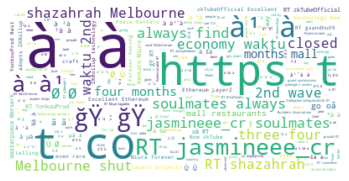

In [14]:
text = " ".join(review for review in mid0_text.value_x)
#print ("There are {} words in the combination of all review.".format(len(text)))
#pure_text = re.sub('[^a-zA-Z]+', '', text)

wordcloud = WordCloud( background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

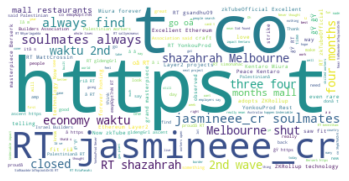

In [15]:
mid0_en = mid0_text.loc[mid0_text['language'] == 'en']


text = " ".join(review for review in mid0_en.value_x)

wordcloud = WordCloud( background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### West Area

In [16]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = west0_text.loc[west0_text.value_y == 1, ['value_x']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Had a couple of kiddddos at the jumpouts this morning, all jumped out well and seem to be coming along great! ğŸ’«ğŸ’« https://t.co/po7Fv9V6E5
@landry235 @peta Yes, a very good question. 
They're like Christians  - do as I say not as I do!
It looks amazing @WSMLLEN wish we were there. My view is an evening zoom meeting!!!! https://t.co/11NE1bBz1P
@rwillingham This is so good!!! 
ğŸ˜�ğŸ˜�ğŸ˜�ğŸ¤£
Just had a wonderful visit to one of our feeder schools. The kids and staff at Our Lady of the Way in Wallan (a braâ€¦ https://t.co/Nbtsc9jhdd


In [17]:
'''
print('5 random reviews with the highest negative sentiment polarity: \n')
cl = west0_text.loc[west0_text.value_y == -1, ['value_x']].sample(5).values
for c in cl:
    print(c[0])
    
'''

"\nprint('5 random reviews with the highest negative sentiment polarity: \n')\ncl = west0_text.loc[west0_text.value_y == -1, ['value_x']].sample(5).values\nfor c in cl:\n    print(c[0])\n    \n"

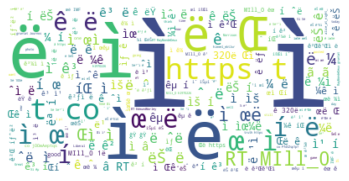

In [18]:
text = " ".join(review for review in west0_text.value_x)
#print ("There are {} words in the combination of all review.".format(len(text)))
#pure_text = re.sub('[^a-zA-Z]+', '', text)

wordcloud = WordCloud( background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

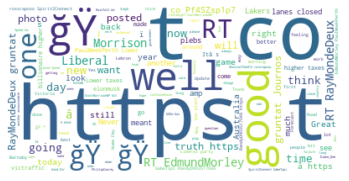

In [19]:
west0_en = west0_text.loc[west0_text['language'] == 'en']


text = " ".join(review for review in west0_en.value_x)

wordcloud = WordCloud( background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### East Area

In [20]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = east0_text.loc[east0_text.value_y == 1, ['value_x']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

I think I overdosed on garlic tonight whilst making a Moroccan spiced vegetable, lentil and barley soup. It was delicious ğŸ˜‹
@RuMacdonald Magnificent.
@MoarToast It was a great episode ! What gonna happen now ğŸ¤”?
@nhpwheritor @DakotasStorm Mah, got replacement flights which means my athletes get a sleep in! So they're happy!
Ah. Still awesome though. ğŸ‘�ğŸ�» https://t.co/HJwpSDVqIC


In [21]:
print('5 random reviews with the highest negative sentiment polarity: \n')
cl = east0_text.loc[east0_text.value_y == -1, ['value_x']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest negative sentiment polarity: 

@VlRTUALBOY @as_a_fruit omg the mosh for Rage when I saw Rico in melb was insane. just a bunch of homosexuals in thâ€¦ https://t.co/cfjk4cKbvw
That is outrageous
Outrageous, theft of a persons art. https://t.co/tWOs5htUAk
@9NewsAUS Insane. Insane. Insane. #dunningkrugereffect.
@FinMatson @withFND Mate this is insane


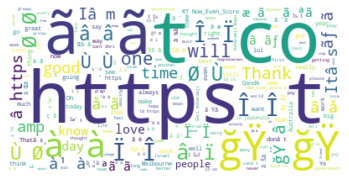

In [22]:
text = " ".join(review for review in east0_text.value_x)
#print ("There are {} words in the combination of all review.".format(len(text)))
#pure_text = re.sub('[^a-zA-Z]+', '', text)

wordcloud = WordCloud( background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

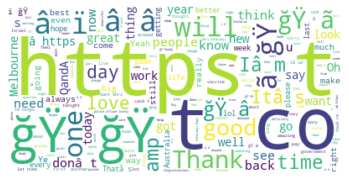

In [23]:
east0_en = east0_text.loc[east0_text['language'] == 'en']


text = " ".join(review for review in east0_en.value_x)

wordcloud = WordCloud( background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### basic single area analysis

#### Mid Area

In [24]:
mid0_text.describe()

id       value_y      follower         friend      text_len  \
count  3.080400e+04  30804.000000  3.080400e+04   30804.000000  30804.000000   
mean   1.395150e+18      0.062552  2.661072e+03    1255.362161    103.168030   
std    1.623771e+14      0.254966  2.495113e+04    4826.295888     54.475991   
min    1.394965e+18     -1.000000  0.000000e+00       0.000000      1.000000   
25%    1.394998e+18      0.000000  1.150000e+02     210.000000     50.000000   
50%    1.395082e+18      0.000000  3.640000e+02     480.000000    112.000000   
75%    1.395256e+18      0.125000  1.098000e+03    1162.000000    142.000000   
max    1.395443e+18      1.000000  2.037451e+06  299372.000000    414.000000   

               hour  
count  30804.000000  
mean      11.004967  
std        4.581617  
min        3.000000  
25%        6.000000  
50%       12.000000  
75%       14.000000  
max       19.000000

In [25]:
mid0_mean = 0.062552

In [26]:
mid0_en.describe()

id       value_y      follower         friend     text_len  \
count  2.541900e+04  25419.000000  2.541900e+04   25419.000000  25419.00000   
mean   1.395150e+18      0.072541  2.800233e+03    1335.591211    104.25776   
std    1.612385e+14      0.272159  2.658352e+04    5191.367396     42.61936   
min    1.394965e+18     -1.000000  0.000000e+00       0.000000      4.00000   
25%    1.394998e+18     -0.063889  1.170000e+02     215.000000     59.00000   
50%    1.395083e+18      0.000000  3.770000e+02     504.000000    126.00000   
75%    1.395255e+18      0.200000  1.147000e+03    1222.000000    142.00000   
max    1.395443e+18      1.000000  2.037451e+06  299372.000000    377.00000   

               hour  
count  25419.000000  
mean      10.824777  
std        4.595930  
min        3.000000  
25%        6.000000  
50%       12.000000  
75%       14.000000  
max       19.000000

Text(0, 0.5, 'Amount')

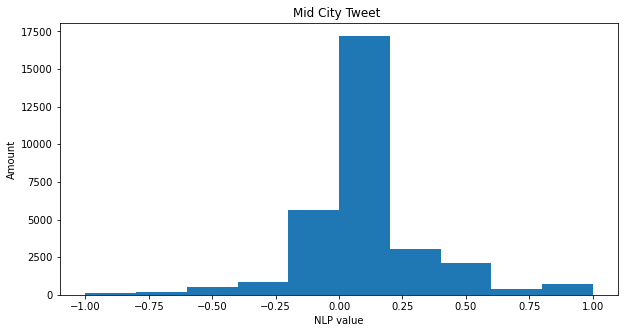

In [27]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
# plot histogram
ax.hist(mid0_text['value_y'])
# set title and labels
ax.set_title('Mid City Tweet ')
ax.set_xlabel('NLP value')
ax.set_ylabel('Amount')

Text(0, 0.5, 'Amount')

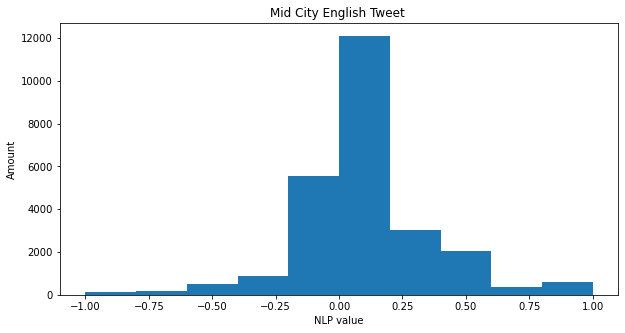

In [28]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
# plot histogram
ax.hist(mid0_en['value_y'])
# set title and labels
ax.set_title('Mid City English Tweet ')
ax.set_xlabel('NLP value')
ax.set_ylabel('Amount')

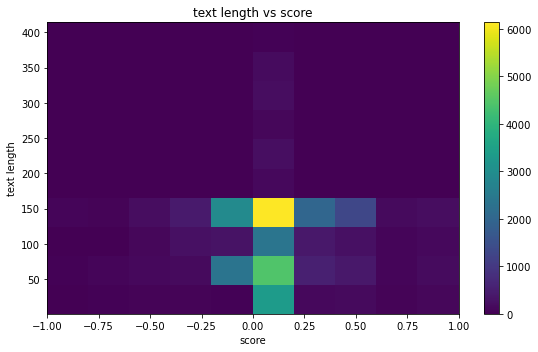

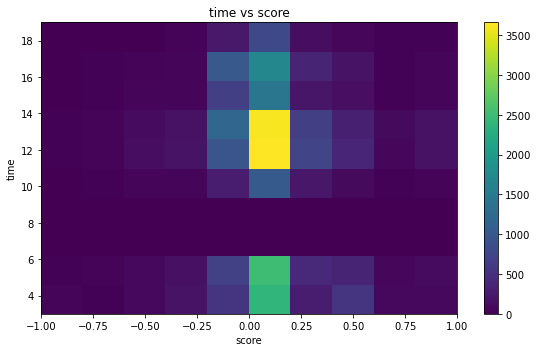

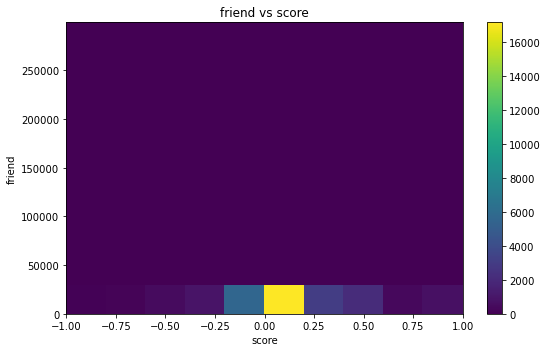

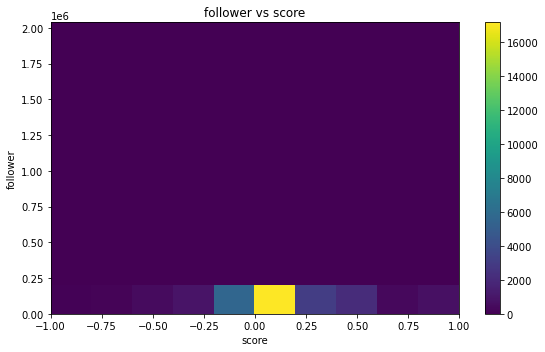

In [29]:
# Creating dataset
x = mid0_text['value_y']
y = mid0_text['text_len']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("text length vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('text length')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = mid0_text['value_y']
y = mid0_text['hour']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("time vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('time')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = mid0_text['value_y']
y = mid0_text['friend']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("friend vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('friend')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = mid0_text['value_y']
y = mid0_text['follower']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("follower vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('follower')
plt.colorbar()
plt.tight_layout()
plt.show()

#### East Area

In [30]:
east0_text.describe()

id      value_y       follower        friend     text_len  \
count  5.286000e+03  5286.000000    5286.000000   5286.000000  5286.000000   
mean   1.395277e+18     0.090598    2181.790390   1654.993000    87.592130   
std    1.819790e+14     0.285642    7044.894201   2892.651692    50.867068   
min    1.394962e+18    -1.000000       0.000000      0.000000     4.000000   
25%    1.395116e+18     0.000000     243.250000    366.000000    46.000000   
50%    1.395306e+18     0.000000     743.000000    880.000000    77.000000   
75%    1.395388e+18     0.175000    1758.000000   2019.000000   137.000000   
max    1.395559e+18     1.000000  138579.000000  73847.000000   386.000000   

              hour  
count  5286.000000  
mean     11.133182  
std       5.981875  
min       0.000000  
25%       7.000000  
50%      11.000000  
75%      14.000000  
max      23.000000

In [31]:
east0_mean = 0.090598

In [32]:
east0_en.describe()

id      value_y       follower        friend     text_len  \
count  4.070000e+03  4070.000000    4070.000000   4070.000000  4070.000000   
mean   1.395277e+18     0.113731    2313.617936   1676.984521    91.564128   
std    1.804892e+14     0.315640    7888.297555   3161.734085    43.791921   
min    1.394962e+18    -1.000000       0.000000      0.000000     4.000000   
25%    1.395121e+18     0.000000     255.250000    372.000000    53.000000   
50%    1.395302e+18     0.000000     722.500000    926.000000    87.000000   
75%    1.395376e+18     0.250000    1732.000000   1868.000000   141.000000   
max    1.395559e+18     1.000000  138579.000000  73847.000000   364.000000   

              hour  
count  4070.000000  
mean     10.956511  
std       5.950878  
min       0.000000  
25%       7.000000  
50%      11.000000  
75%      13.000000  
max      23.000000

Text(0, 0.5, 'Amount')

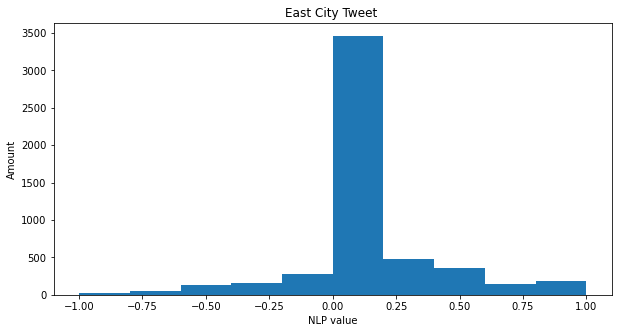

In [33]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
# plot histogram
ax.hist(east0_text['value_y'])
# set title and labels
ax.set_title('East City Tweet ')
ax.set_xlabel('NLP value')
ax.set_ylabel('Amount')

Text(0, 0.5, 'Amount')

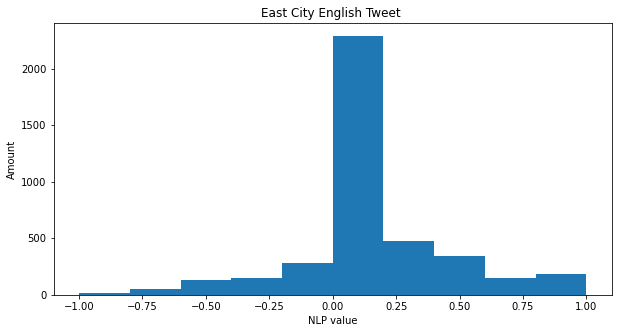

In [34]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
# plot histogram
ax.hist(east0_en['value_y'])
# set title and labels
ax.set_title('East City English Tweet ')
ax.set_xlabel('NLP value')
ax.set_ylabel('Amount')

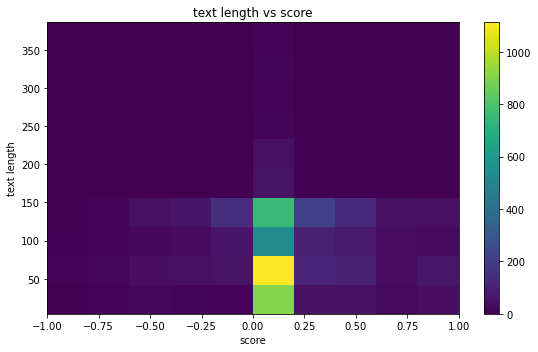

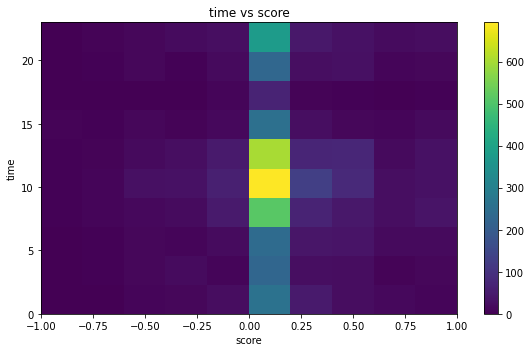

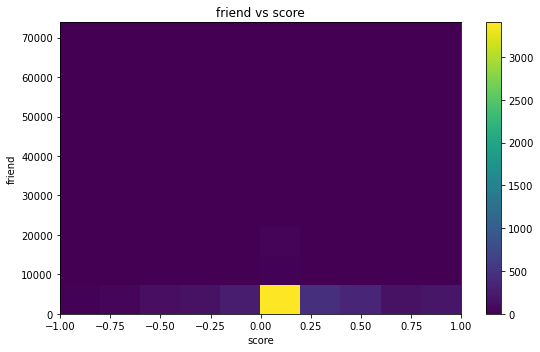

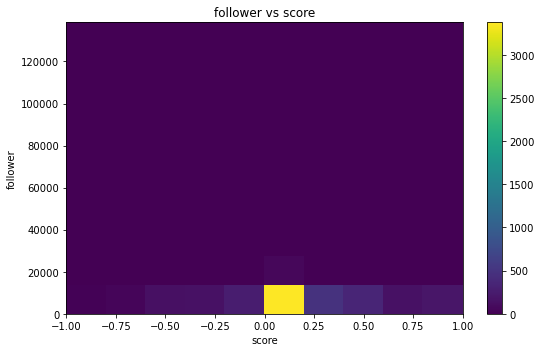

In [35]:
#Creating dataset
x = east0_text['value_y']
y = east0_text['text_len']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("text length vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('text length')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = east0_text['value_y']
y = east0_text['hour']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("time vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('time')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = east0_text['value_y']
y = east0_text['friend']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("friend vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('friend')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = east0_text['value_y']
y = east0_text['follower']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("follower vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('follower')
plt.colorbar()
plt.tight_layout()
plt.show()

#### West Area

In [36]:
west0_text.describe()

id     value_y       follower        friend    text_len  \
count  9.190000e+02  919.000000     919.000000    919.000000  919.000000   
mean   1.395232e+18    0.044979    2377.285092   1233.018498  112.310120   
std    1.753820e+14    0.217068   12226.292222   1916.329896   83.121001   
min    1.394928e+18   -1.000000       0.000000      1.000000    5.000000   
25%    1.395058e+18    0.000000     199.500000    424.000000   51.000000   
50%    1.395260e+18    0.000000     393.000000    753.000000   91.000000   
75%    1.395364e+18    0.000000    1784.000000   1052.500000  142.000000   
max    1.395550e+18    1.000000  115098.000000  27583.000000  348.000000   

             hour  
count  919.000000  
mean    10.334059  
std      6.069715  
min      0.000000  
25%      6.000000  
50%     10.000000  
75%     14.000000  
max     23.000000

In [37]:
west0_mean = 0.044979

In [38]:
west0_en.describe()

id     value_y       follower        friend    text_len  \
count  4.990000e+02  499.000000     499.000000    499.000000  499.000000   
mean   1.395243e+18    0.082437    3370.737475   1130.733467   90.737475   
std    1.806014e+14    0.289311   16506.717971   2226.362741   40.659883   
min    1.394928e+18   -1.000000       0.000000      1.000000   14.000000   
25%    1.395154e+18    0.000000     141.000000    307.000000   53.500000   
50%    1.395253e+18    0.000000     329.000000    505.000000   91.000000   
75%    1.395340e+18    0.200000     532.500000   1249.000000  136.000000   
max    1.395546e+18    1.000000  115098.000000  27583.000000  154.000000   

             hour  
count  499.000000  
mean    10.120240  
std      7.017875  
min      0.000000  
25%      4.500000  
50%      9.000000  
75%     14.000000  
max     23.000000

Text(0, 0.5, 'Amount')

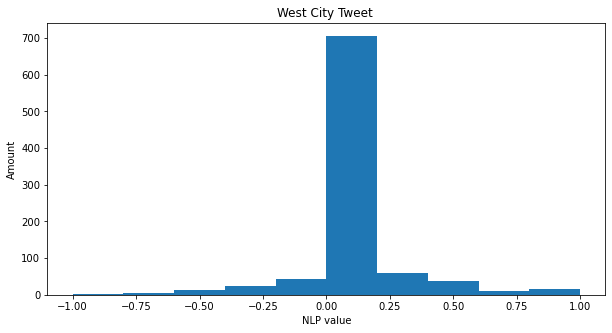

In [39]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
# plot histogram
ax.hist(west0_text['value_y'])
# set title and labels
ax.set_title('West City Tweet ')
ax.set_xlabel('NLP value')
ax.set_ylabel('Amount')

Text(0, 0.5, 'Amount')

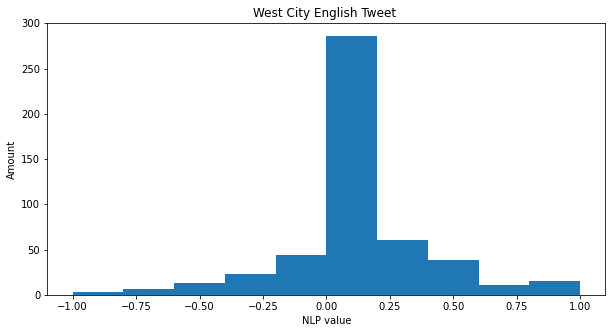

In [40]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
# plot histogram
ax.hist(west0_en['value_y'])
# set title and labels
ax.set_title('West City English Tweet ')
ax.set_xlabel('NLP value')
ax.set_ylabel('Amount')

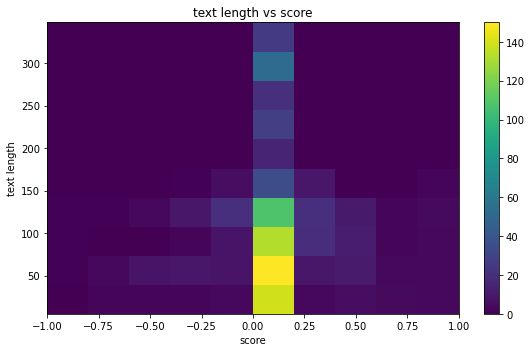

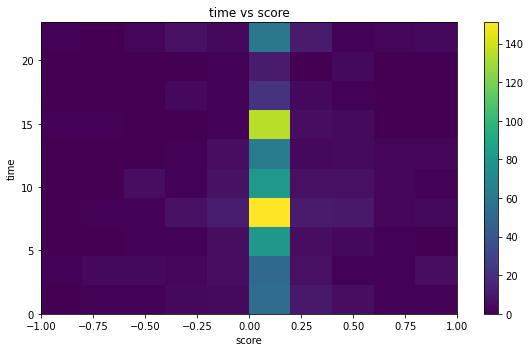

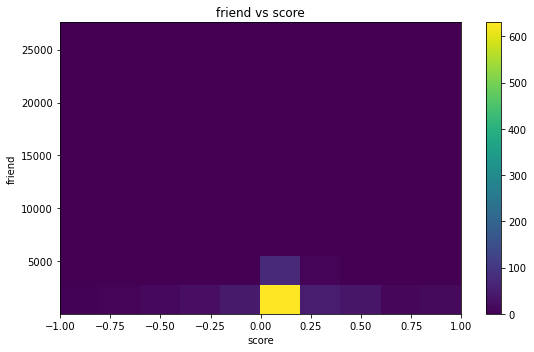

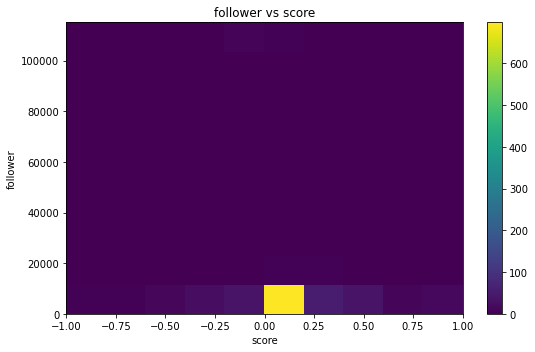

In [41]:
#Creating dataset
x = west0_text['value_y']
y = west0_text['text_len']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("text length vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('text length')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = west0_text['value_y']
y = west0_text['hour']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("time vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('time')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = west0_text['value_y']
y = west0_text['friend']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("friend vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('friend')
plt.colorbar()
plt.tight_layout()
plt.show()

##################################################################

# Creating dataset
x = west0_text['value_y']
y = west0_text['follower']
  
fig,ax = plt.subplots(figsize =(8, 5))
# Creating plot
plt.hist2d(x, y)
plt.title("follower vs score")
  
# show plot
ax.set_xlabel('score') 
ax.set_ylabel('follower')
plt.colorbar()
plt.tight_layout()
plt.show()

### population vs score

In [42]:
all_mean = [mid0_mean, east0_mean, west0_mean]
all_mean

[0.062552, 0.090598, 0.044979]

In [43]:
pop_count

[4457433, 418341, 202419]

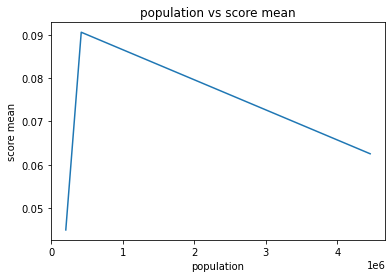

In [44]:
plt.plot(pop_count,all_mean)
plt.title('population vs score mean')
plt.xlabel('population')
plt.ylabel('score mean')
plt.show()

### Overall 

In [45]:
frames = [mid0_text,west0_text,east0_text]
all_df = pd.concat(frames)
all_df

id                                            value_x  \
0     1394965330578055168  RT @maximum_sincere: Fuck it must be insanely ...   
1     1394965332650045441  RT @shazahrah: ??!! Melbourne shut down their ...   
2     1394965334239629315                Transvision Vamp - I Want Your Love   
3     1394965334612971521  RT @fizawanders: Cannot unsee ğŸ˜‚ #MasterChef...   
4     1394965335288205312                 @msimaker1 https://t.co/4PyGqvn0nK   
...                   ...                                                ...   
5281  1395558142969221121  I used to teach as a language instructor at UC...   
5282  1395558247654838272          LFG!! #LetsGoPens https://t.co/59gGA9zBAB   
5283  1395558453603487744     They have no ğŸ�€ ğŸ�€ https://t.co/Cyl62lCs2f   
5284  1395558476667969560  @SheepishSophie We have a similar situation, i...   
5285  1395558594729299973               @slyspots Whatâ€™s strange about it?   

       value_y group language  follower  friend  \
0    -0.333333   mid       en        29    1389   
1    -0.063889   mid       en       545     906   
2     0.500000   mid       en        52      65   
3     0.000000   mid       en       580    1695   
4     0.000000   mid      und      2653     366   
...        ...   ...      ...       ...     ...   
5281  0.000000  east       en        87     566   
5282  0.000000  east      und      1415     473   
5283  0.000000  east       en        94    1153   
5284  0.142857  east       en       684    1030   
5285 -0.050000  east       en       357     791   

                                time  text_len  hour  
0     Wed May 19 10:37:06 +0000 2021       142    10  
1     Wed May 19 10:37:07 +0000 2021       142    10  
2     Wed May 19 10:37:07 +0000 2021        35    10  
3     Wed May 19 10:37:07 +0000 2021        72    10  
4     Wed May 19 10:37:07 +0000 2021        34    10  
...                              ...       ...   ...  
5281  Fri May 21 01:52:44 +0000 2021        93     1  
5282  Fri May 21 01:53:09 +0000 2021        41     1  
5283  Fri May 21 01:53:58 +0000 2021        46     1  
5284  Fri May 21 01:54:03 +0000 2021       101     1  
5285  Fri May 21 01:54:31 +0000 2021        36     1  

[37009 rows x 10 columns]

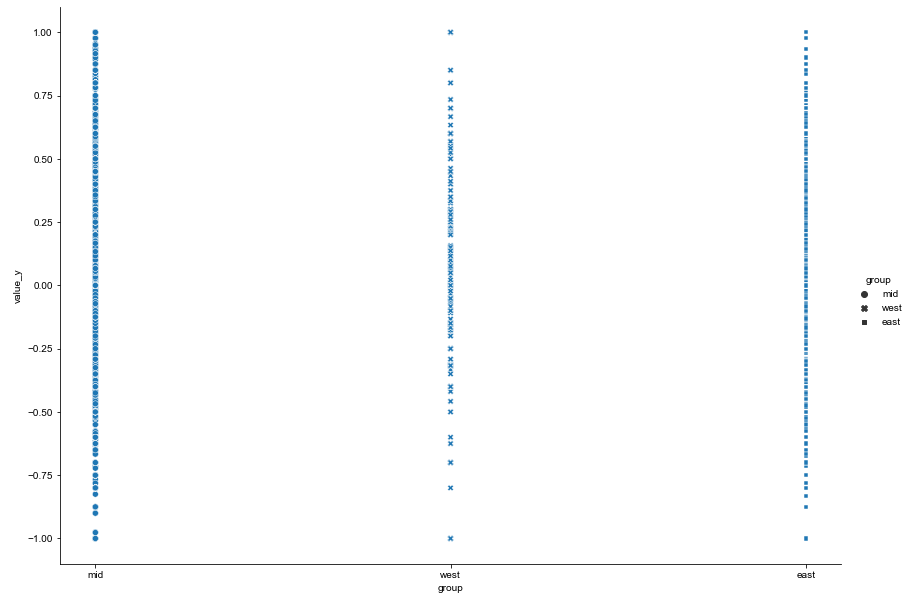

In [46]:
sns.relplot(x="group", y="value_y",  data=all_df,style="group", height=8.27, aspect=11.7/8.27)
sns.set(context='notebook')
rcParams['figure.figsize'] = 15, 15


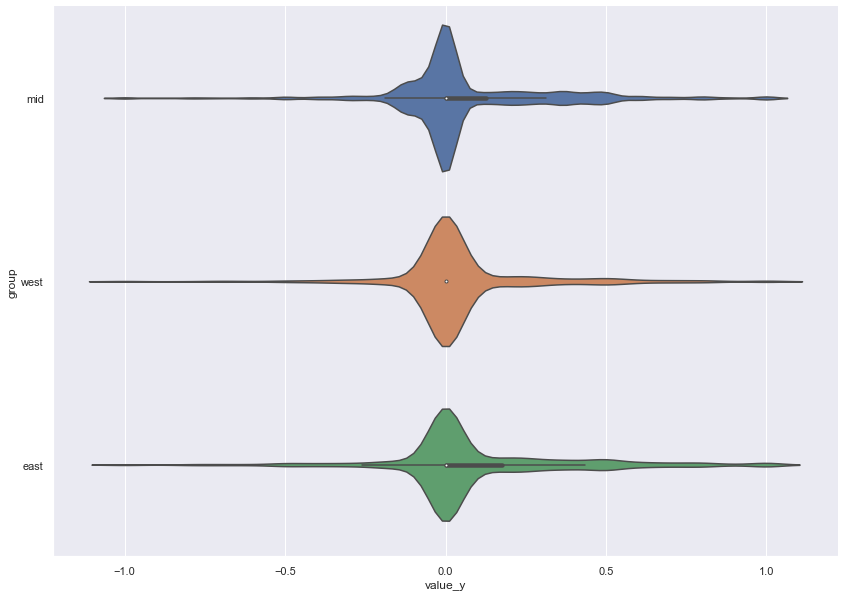

In [47]:
sns.catplot(x="value_y", y="group", kind="violin", data=all_df, height=8.27, aspect=11.7/8.27)

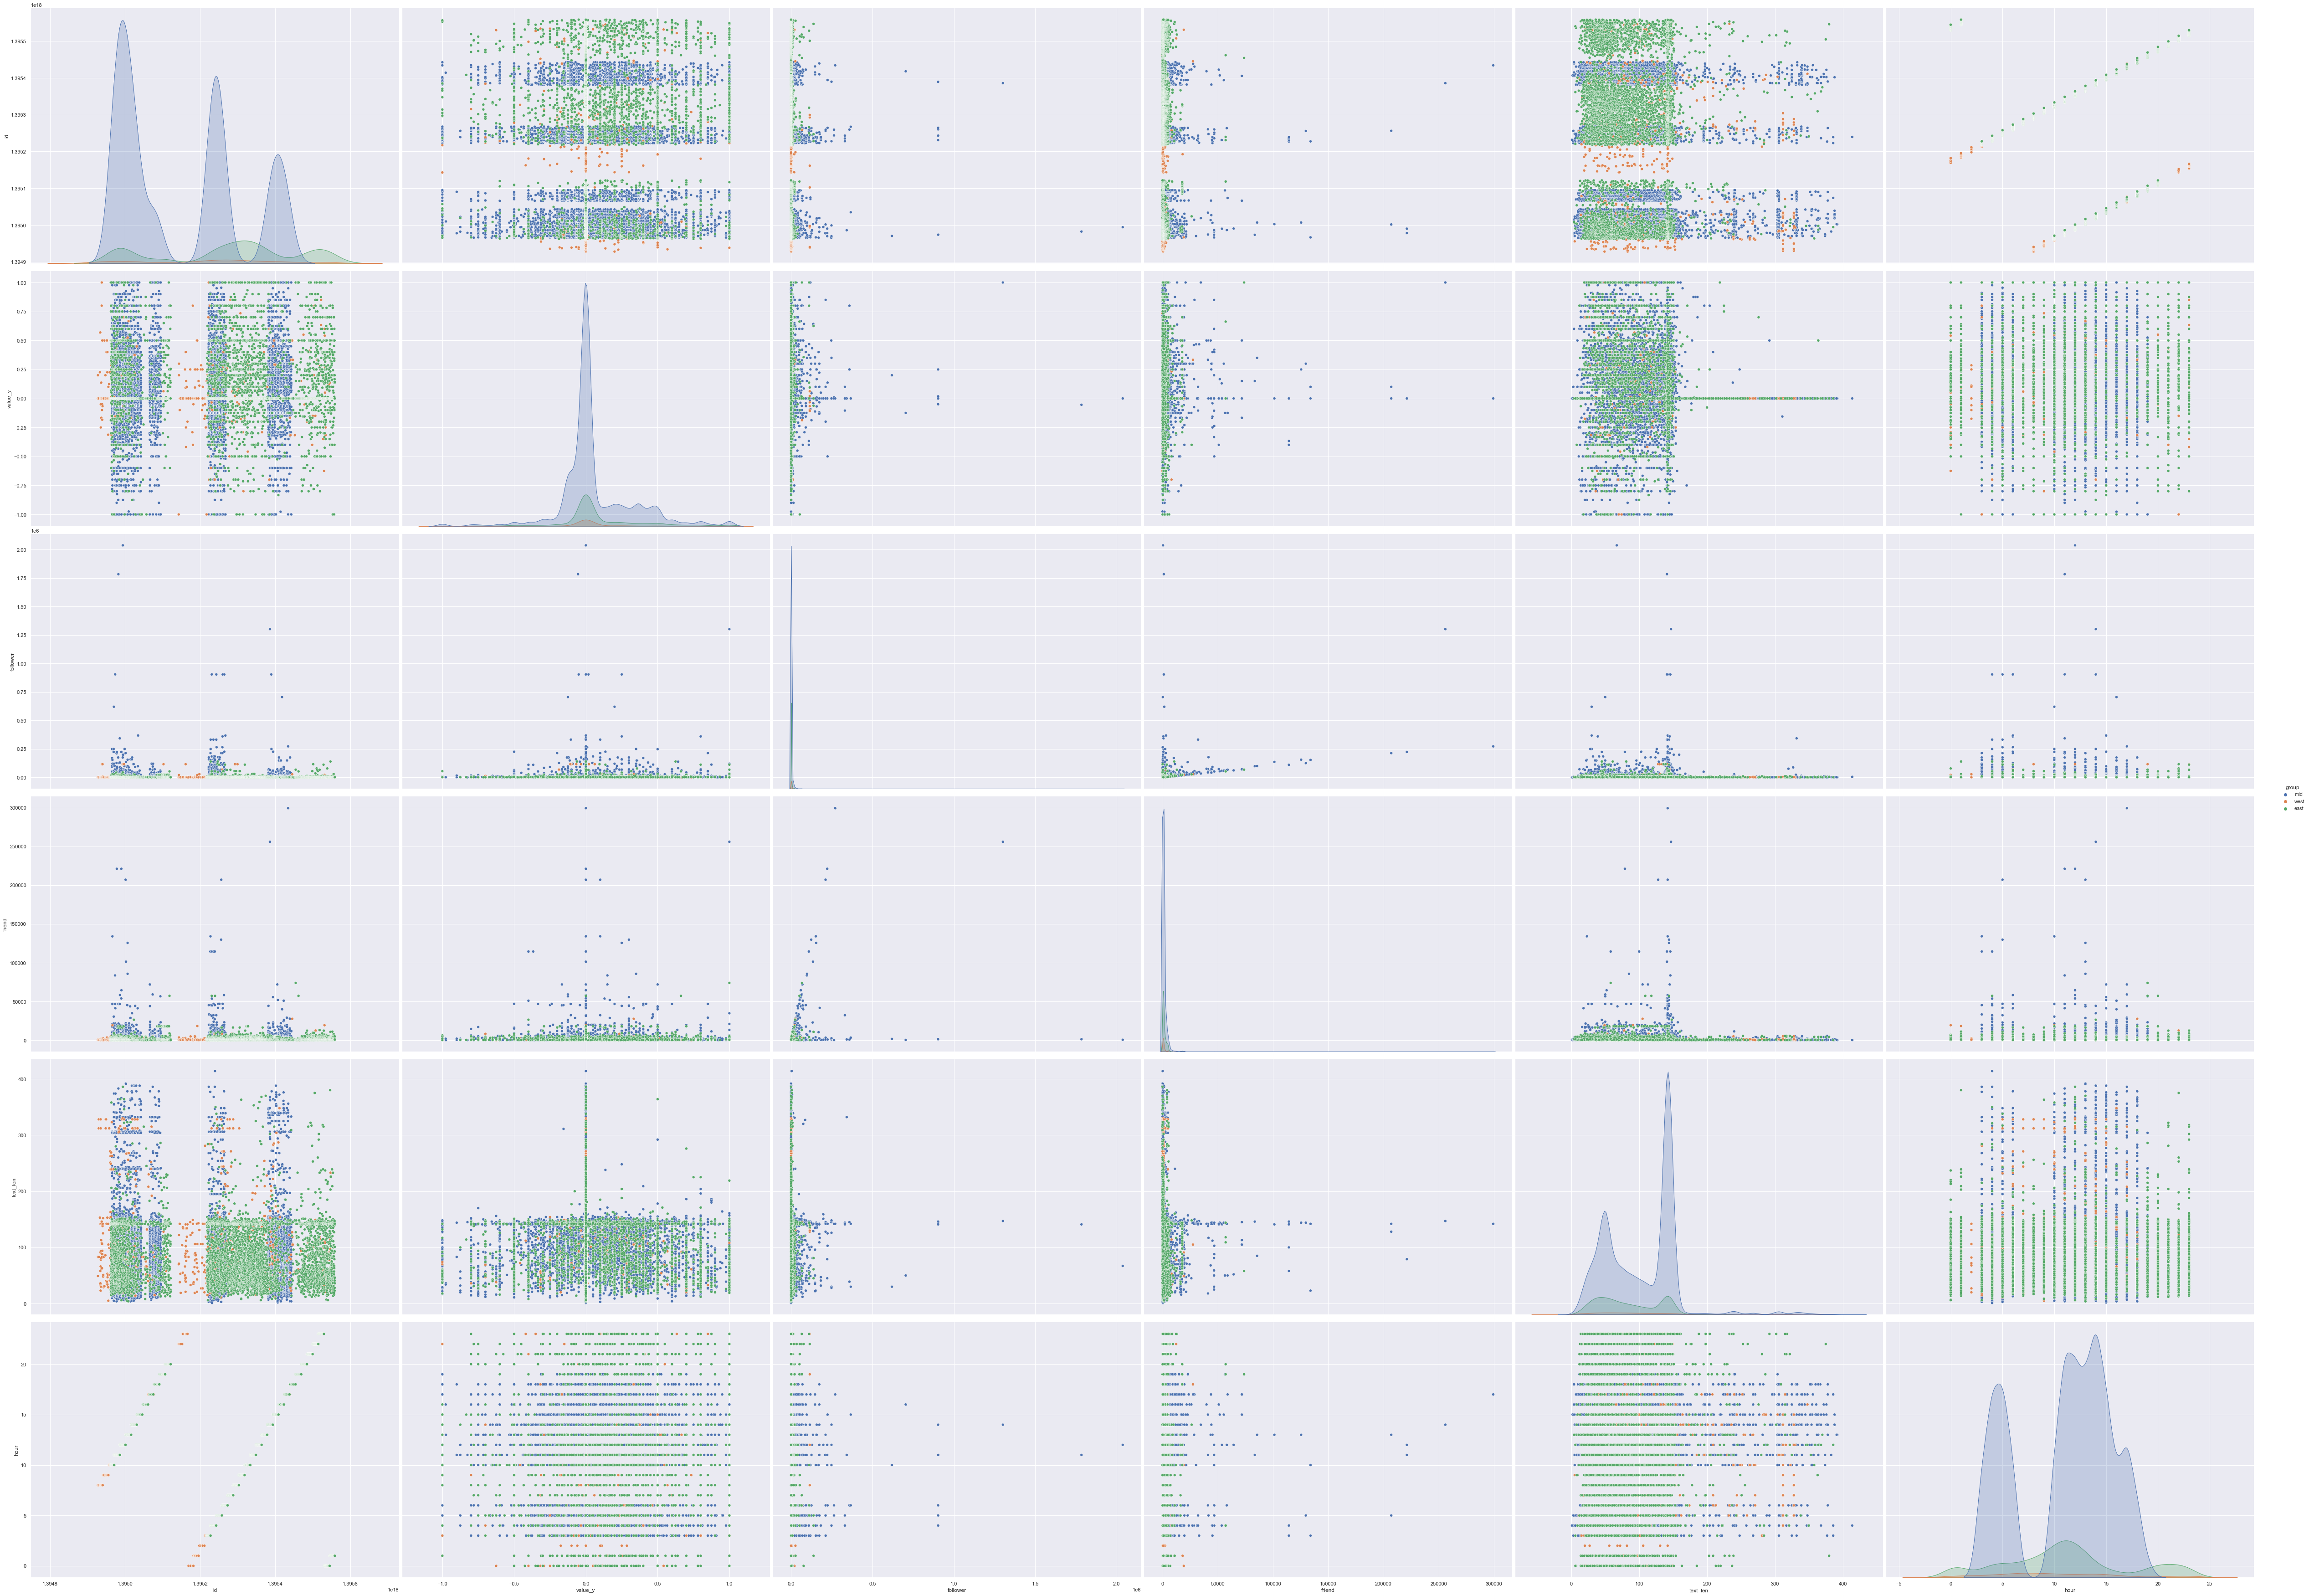

In [48]:
sns.pairplot(all_df, hue="group", height=8.27, aspect=11.7/8.27)
